In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display


In [2]:
#funkcja import pliku
def f_file_import(name:str):
    return pd.read_csv(name)


In [3]:
#Zaimportowanie pliku z pc
df_clean = f_file_import('df_clean.csv')

In [4]:
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def count_plot_col(df, var_col:str, var_x:str,column_wrap:int =3, height_value:float = 4):
    g = sns.catplot(data = df, col = 'main_category' , x = var_x,  kind = 'count', height = height_value, col_wrap=column_wrap)
    g.set_titles('{col_name}');


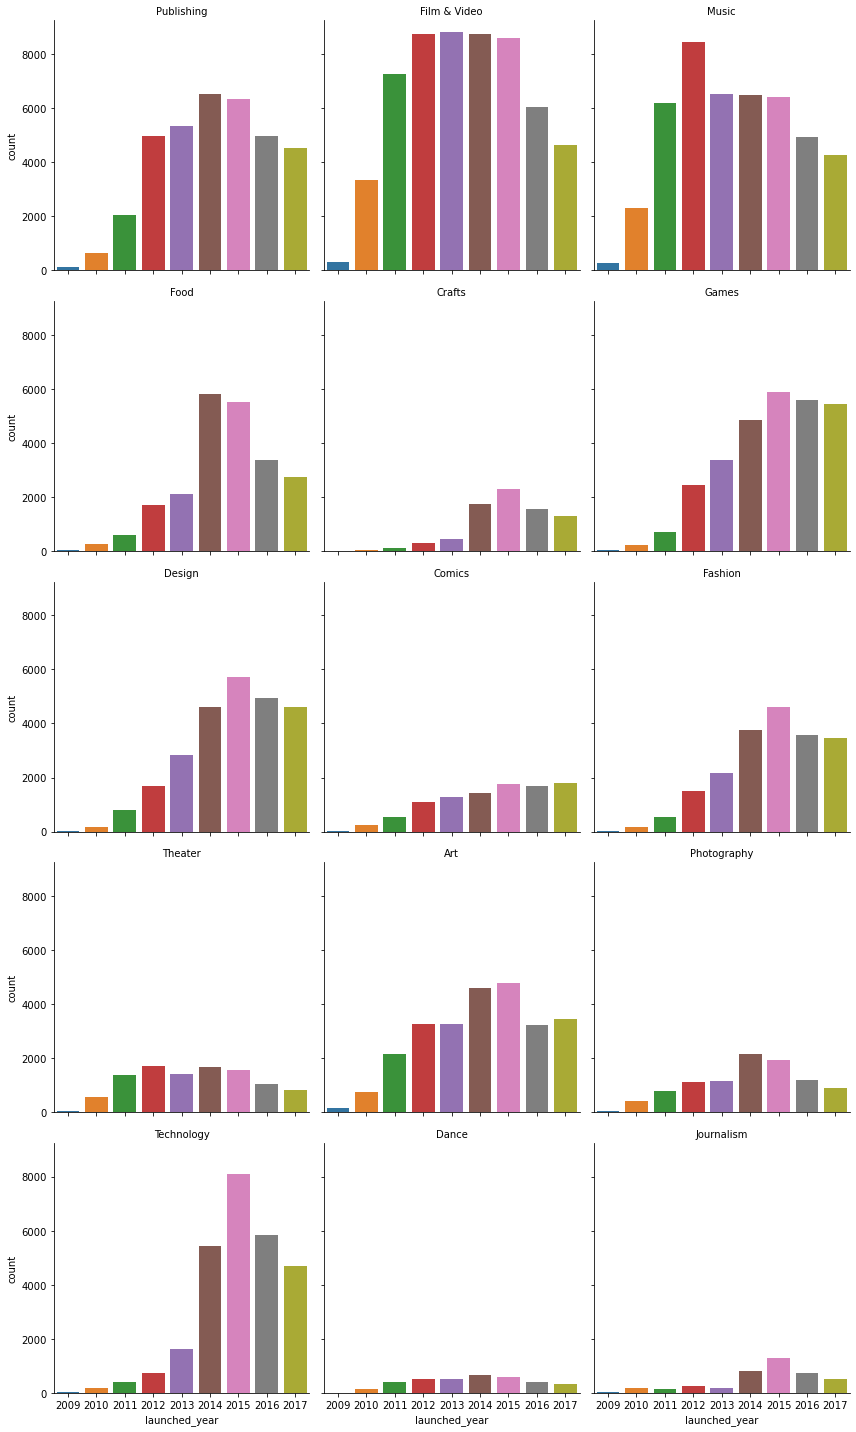

In [5]:
#Tak wyglądają wykresy teraz
year_main_category_count = count_plot_col(df_clean, 'main_category', 'launched_year')
year_main_category_count

In [6]:
#lista kategorii do wyboru
list_main_category = list(df_clean['main_category'].unique())
list_main_category

['Publishing',
 'Film & Video',
 'Music',
 'Food',
 'Crafts',
 'Games',
 'Design',
 'Comics',
 'Fashion',
 'Theater',
 'Art',
 'Photography',
 'Technology',
 'Dance',
 'Journalism']

In [7]:
#Definicja widgetu
wdg_year_main_category_count = widgets.SelectMultiple(
    options=list_main_category,
    value=[list_main_category[0]],
    #rows=10,
    description='Kategoria',
    disabled=False)

In [8]:
#Wybieram interesujące mnie kategorie
wdg_year_main_category_count

SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Music', 'Food', 'C…

In [14]:
#Tworzę z nich listę
list_wdg_year_main_category = list(wdg_year_main_category_count.value)
list_wdg_year_main_category

['Music', 'Food', 'Crafts']

In [15]:
# tworzę DF z wyfiltrowanymi kategoriami
df_new = df_clean[df_clean['main_category'].isin(list_wdg_year_main_category)]
df_new.head(3)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,launched_month,launched_year,launched_date,duration
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.0,3,2012,2012-03-17,30
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.0,2,2016,2016-02-26,35
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,2014-12-01 18:30:44,successful,16,US,1205.0,1000.0,12,2014,2014-12-01,20


In [16]:
#Sprawdzenie, czy w danych rzeczywiście mamy tylko dane z listy
df_new['main_category'].unique()

array(['Music', 'Food', 'Crafts'], dtype=object)

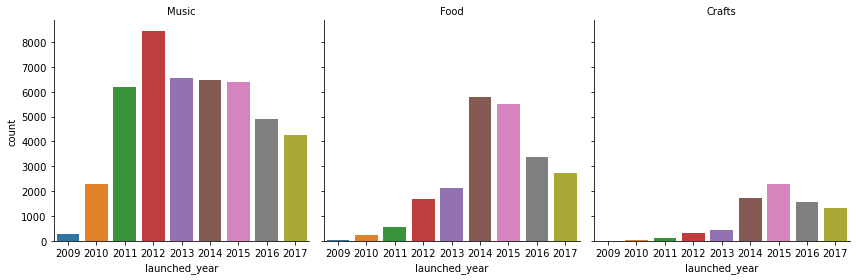

In [17]:
#rysuję wykresy z nowym DF bazującym na wyborze wartości z widgetu
plt_wdg_year_main_category_count = count_plot_col(df_new, 'main_category', 'launched_year',
                                                  column_wrap=3, height_value = 4)


In [13]:
#Do rozważenia dodanie przycisku Odśwież, aby przeliczyło wykresy z nową listą kategorii